In [1]:
import os
import cv2
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

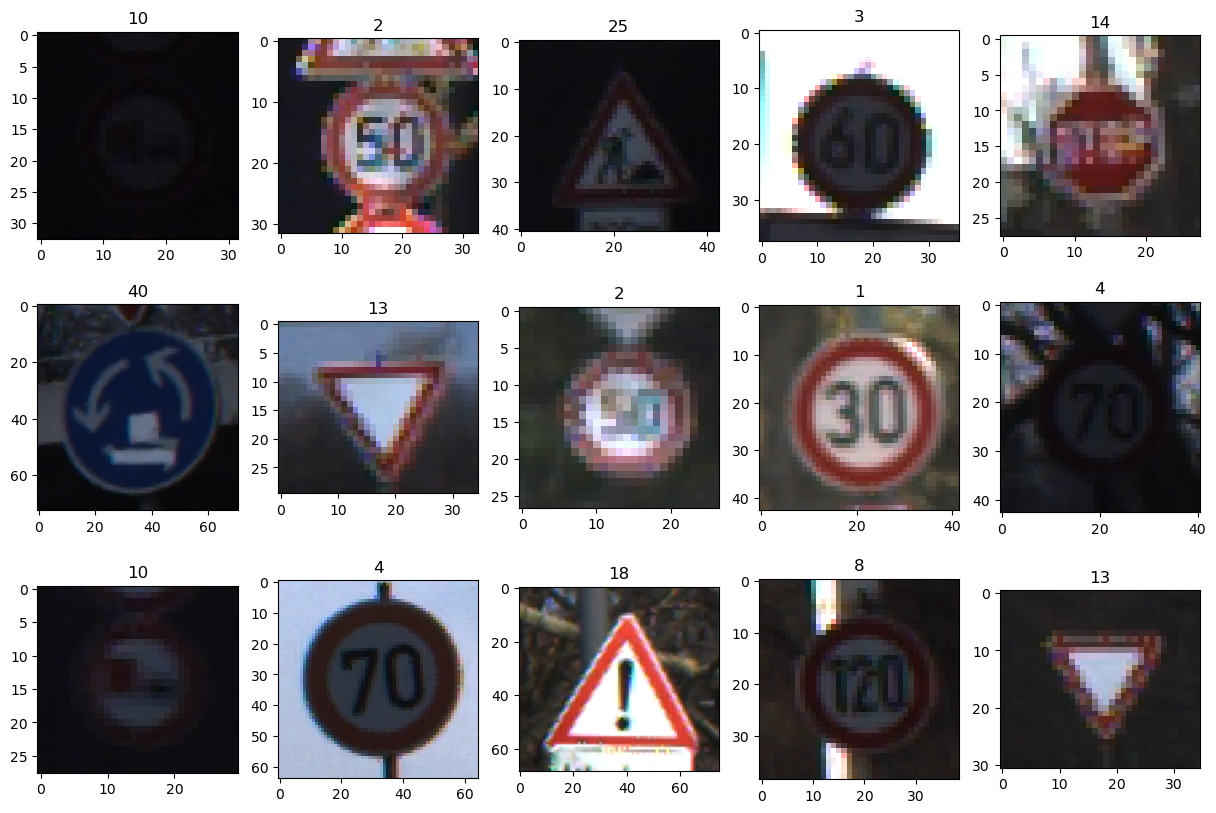

In [2]:
# Load the training labels
root = r"C:\Users\hanna\ComputerVision\archive" # Path to the dataset location, e.g., '/data/janko/dataset/GTSRB'
data = pd.read_csv(os.path.join(root, 'Train.csv'))

# Number of training samples (amount of samples in data)
num_samples = len(data)

# Show random data samples
for ii in range(15):
    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Show image
    plt.subplot(3,5,ii+1), plt.imshow(img), plt.title(data.iloc[idx]['ClassId'])

In [3]:
 # Extract class identifiers
# Hint: Check the csv 
ids = data['ClassId'].unique()
print(ids)



[20  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


(Text(0.5, 0, 'Traffic Sign ID'), Text(0, 0.5, 'Counts'))

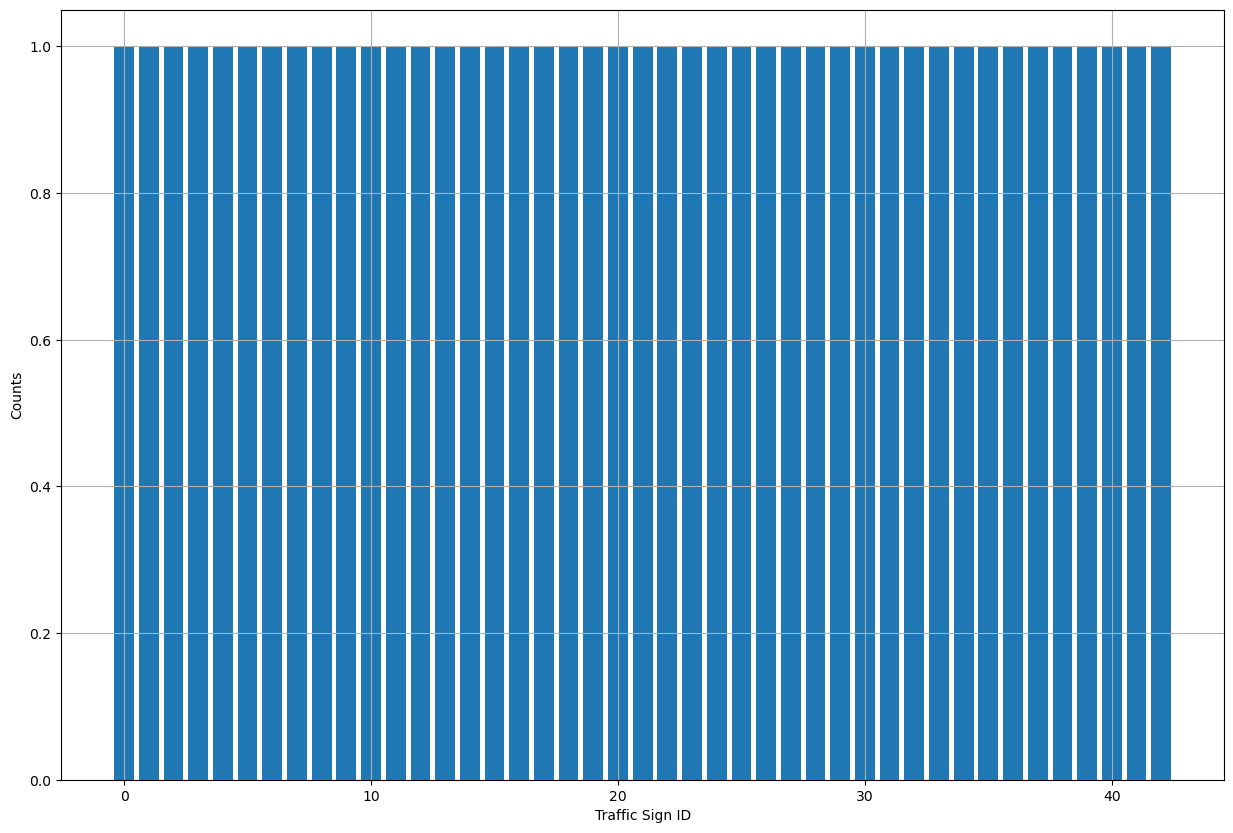

In [4]:
from collections import Counter
hist = Counter(ids)

plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')

(Text(0.5, 0, 'Class Distribution'), Text(0, 0.5, 'Number of Images'))

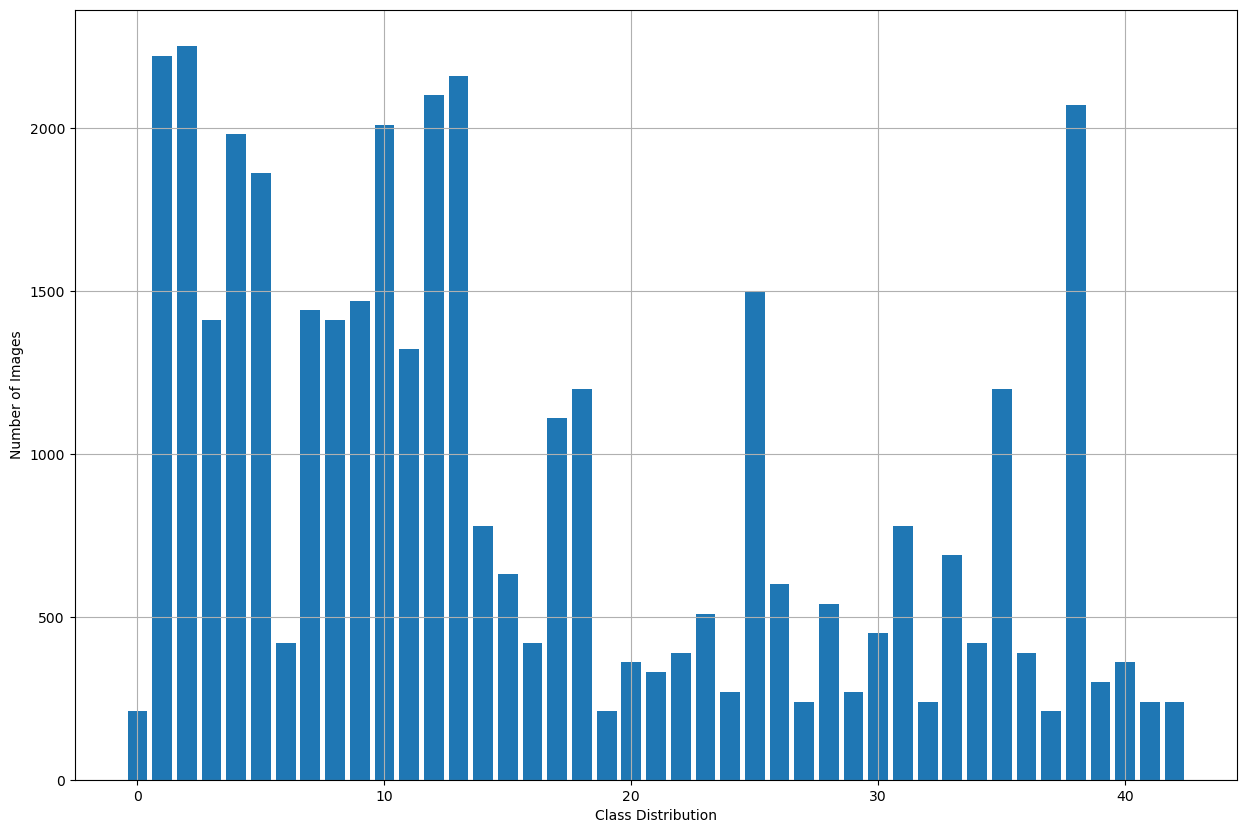

In [5]:
class_distribution = data['ClassId'].value_counts()

plt.bar(class_distribution.index, class_distribution.values), plt.grid(True) 
plt.xlabel('Class Distribution'), plt.ylabel('Number of Images')

Please answer the following questions:

Do you consider the dataset to be balanced? If so, why? If not, why? - Due to class distribution the number of images varies a lot from class to class, which means that the dataset is unbalanced.

Are there any classes that are (significantly) over-represented or under-represeneted? - from the class distribution histogram I see that classes 0, 19, 24, 27, 29, 32, 37, 41, 42 are under-represeneted and 1,2, 12, 13, 38 over-represented

Text(0.5, 1.0, 'Height Distribution')

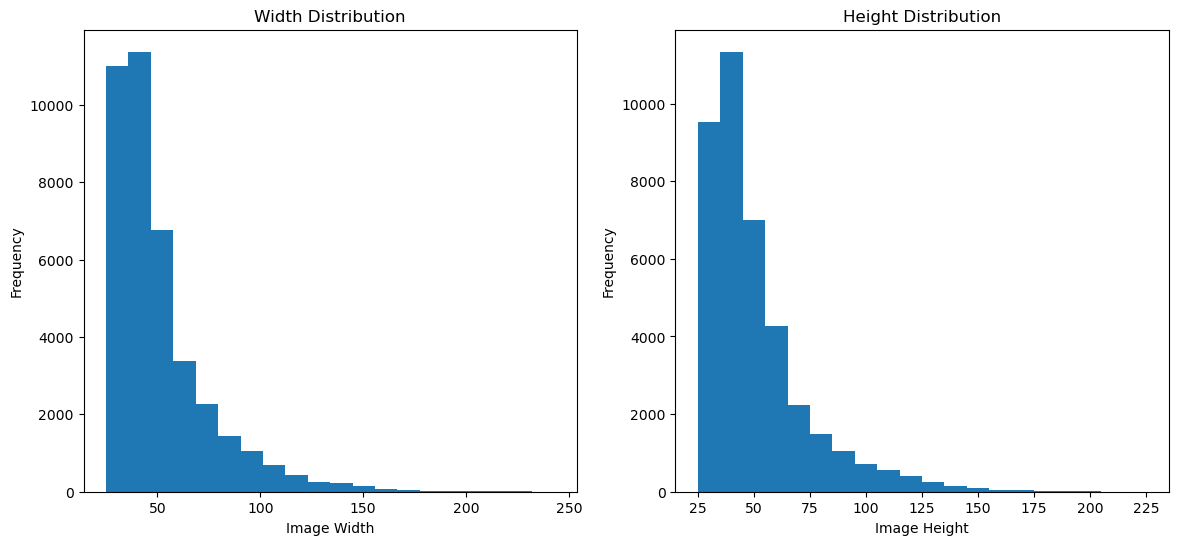

In [6]:
widths = data['Width']
heights = data ['Height']

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(widths, bins=20)
plt.xlabel('Image Width'), plt.ylabel('Frequency')
plt.title('Width Distribution')

plt.subplot(1, 2, 2)
plt.hist(heights, bins=20)
plt.xlabel('Image Height'), plt.ylabel('Frequency')
plt.title('Height Distribution')




we might need to resize images because heights and weights varies significantly 

(Text(0.5, 0, 'Class ID'), Text(0, 0.5, 'Average Brightness'))

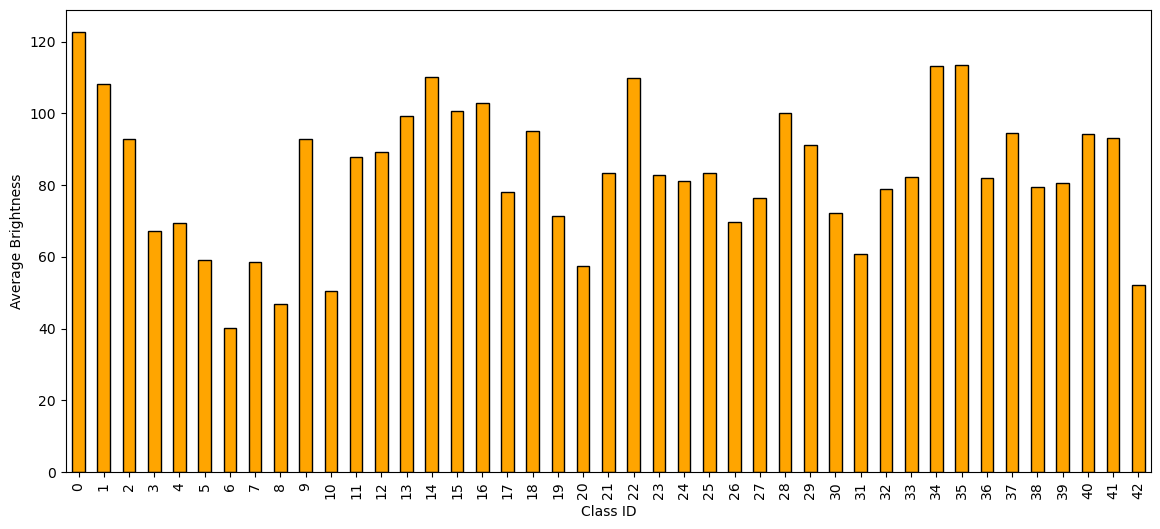

In [10]:
brightness_list = []

# Loop over all images and calculate brightness
for idx in range(num_samples):
    # Load image
    img_path = os.path.join(root, data.iloc[idx]['Path'])
    img = cv2.imread(img_path)
    
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Calculate mean pixel intensity
    mean_brightness = np.mean(gray_img)
    brightness_list.append((data.iloc[idx]['ClassId'], mean_brightness))

# Create DataFrame to store brightness values by ClassId
brightness_df = pd.DataFrame(brightness_list, columns=['ClassId', 'Brightness'])

# Plot the brightness distribution for each class
plt.figure(figsize=(14, 6))
brightness_df.groupby('ClassId')['Brightness'].mean().plot(kind='bar', color='orange', edgecolor='black')
plt.xlabel('Class ID'), plt.ylabel('Average Brightness')



looks like the distribution of brightness is also not really homogeneous